# About the dataset
This dataset was downloaded from NEU Metal Surface Defects Databse which contains six kinds of typical surface defects of the hot-rolled steel strip are collected, i.e., rolled-in scale (RS), patches (Pa), crazing (Cr), pitted surface (PS), inclusion (In) and scratches (Sc). The database includes 1,800 grayscale images: 300 samples each of six different kinds of typical surface defects.

But for this analysis, the dataset divided into 3 directories. The training directory contains 276 images of each class from the 300 images. The rest 24 images of each class also divided into tests and valid datasets.

In [1]:
import numpy as np
import pandas as pd 
import os
import opendatasets as od
import time

Initial action: Download the dataset on local computer

In addition, besides the typical data science packages, the pillow distribution for image processing is needed.
- pip install Pillow
- pip install np_utils

In [2]:
# od.download("https://www.kaggle.com/datasets/fantacher/neu-metal-surface-defects-data")

In [3]:
cur_dir = os.getcwd()

In [4]:
train_dir = cur_dir + '/kaggle/input/neu-metal-surface-defects-data/NEU Metal Surface Defects Data/train'
val_dir = cur_dir + '/kaggle/input/neu-metal-surface-defects-data/NEU Metal Surface Defects Data/valid'
test_dir= cur_dir + '/kaggle/input/neu-metal-surface-defects-data/NEU Metal Surface Defects Data/test'
print("Path Direcorty: ",os.listdir(cur_dir + "/kaggle/input/neu-metal-surface-defects-data/NEU Metal Surface Defects Data"))
print("Train Direcorty: ",os.listdir(train_dir))
print("Test Direcorty: ",os.listdir(test_dir))
print("Validation Direcorty: ",os.listdir(val_dir))

Path Direcorty:  ['test', 'Thumbs.db', 'train', 'valid']
Train Direcorty:  ['Crazing', 'Inclusion', 'Patches', 'Pitted', 'Rolled', 'Scratches']
Test Direcorty:  ['Crazing', 'Inclusion', 'Patches', 'Pitted', 'Rolled', 'Scratches']
Validation Direcorty:  ['Crazing', 'Inclusion', 'Patches', 'Pitted', 'Rolled', 'Scratches']


## Here, you can see the dataset distribution for 'Inclusion' surface defect. Rest of the dataset also follow the same distribution

In [5]:
print("Training Inclusion data:",len(os.listdir(train_dir+'/'+'Inclusion')))

print("Testing Inclusion data:",len(os.listdir(test_dir+'/'+'Inclusion')))

print("Validation Inclusion data:",len(os.listdir(val_dir+'/'+'Inclusion')))

Training Inclusion data: 276
Testing Inclusion data: 12
Validation Inclusion data: 12


In [6]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Pre-processing the data

In [7]:
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)


test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 10 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(200, 200),
        batch_size=10,
        class_mode='categorical')

# Flow validation images in batches of 10 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        val_dir,
        target_size=(200, 200),
        batch_size=10,
        class_mode='categorical')

Found 1656 images belonging to 6 classes.
Found 72 images belonging to 6 classes.


## Stop training the model at 98% traning accuracy

In [8]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > 0.98 ):
            print("\nReached 98% accuracy so cancelling training!")
            self.model.stop_training = True 

In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (2,2), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (2,2), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (2,2), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(6, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 199, 199, 32)      416       
                                                                 
 max_pooling2d (MaxPooling2  (None, 99, 99, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 98, 98, 64)        8256      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 49, 49, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 48, 48, 128)       32896     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 24, 24, 128)       0

### Calculation Timer

In [10]:
start_time = time.time()

In [11]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
print('Compiled!')

Compiled!


In [12]:
callbacks = myCallback()
history = model.fit(train_generator,
        batch_size = 32,
        epochs=20,
        validation_data=validation_generator,
        callbacks=[callbacks],
        verbose=1, shuffle=True)

Epoch 1/20
166/166 [==============================] - 51s 303ms/step - loss: 1.9152 - accuracy: 0.2729 - val_loss: 1.3572 - val_accuracy: 0.5833
Epoch 2/20
166/166 [==============================] - 48s 289ms/step - loss: 1.1995 - accuracy: 0.5284 - val_loss: 0.8130 - val_accuracy: 0.6250
Epoch 3/20
166/166 [==============================] - 49s 292ms/step - loss: 0.8590 - accuracy: 0.6987 - val_loss: 0.4224 - val_accuracy: 0.8333
Epoch 4/20
166/166 [==============================] - 48s 292ms/step - loss: 0.6141 - accuracy: 0.7923 - val_loss: 0.2424 - val_accuracy: 0.9306
Epoch 5/20
166/166 [==============================] - 49s 292ms/step - loss: 0.5210 - accuracy: 0.8158 - val_loss: 0.4508 - val_accuracy: 0.8056
Epoch 6/20
166/166 [==============================] - 49s 292ms/step - loss: 0.4663 - accuracy: 0.8508 - val_loss: 0.1661 - val_accuracy: 0.9444
Epoch 7/20
166/166 [==============================] - 49s 295ms/step - loss: 0.4325 - accuracy: 0.8635 - val_loss: 0.0908 - val_ac

In [13]:
print("Calculation time duration:\t %.2f seconds" % (time.time() - start_time))

Calculation time duration:	 978.07 seconds


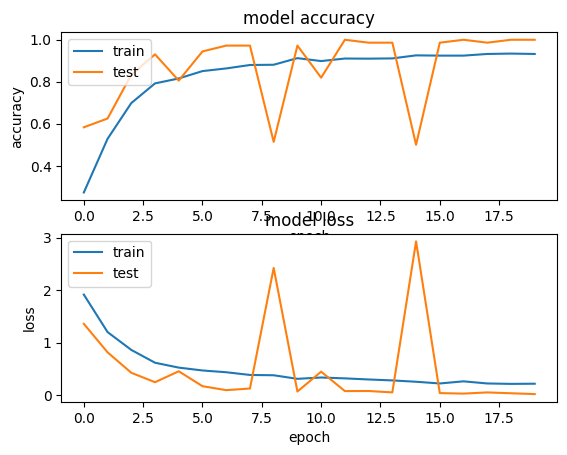

In [14]:
import matplotlib.pyplot as plt 
plt.figure(1)  
# summarize history for accuracy  
plt.subplot(211)  
plt.plot(history.history['accuracy'])  
plt.plot(history.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
   
 # summarize history for loss  
   
plt.subplot(212)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()


# Test Result visualization

In [15]:
# First, we are going to load the file names and their respective target labels into numpy array! 
from sklearn.datasets import load_files
import numpy as np

test_dir = cur_dir + '/kaggle/input/neu-metal-surface-defects-data/NEU Metal Surface Defects Data/test'

def load_dataset(path):
    data = load_files(path)
    files = np.array(data['filenames'])
    targets = np.array(data['target'])
    target_labels = np.array(data['target_names'])
    return files,targets,target_labels
    
x_test, y_test,target_labels = load_dataset(test_dir)

In [16]:
no_of_classes = len(np.unique(y_test))
no_of_classes

6

In [17]:
from tensorflow.keras import utils 
y_test = utils.to_categorical(y_test,no_of_classes)


In [18]:
# We just have the file names in the x set. Let's load the images and convert them into array.
from keras.preprocessing.image import array_to_img, img_to_array, load_img

def convert_image_to_array(files):
    images_as_array=[]
    for file in files:
        # Convert to Numpy Array
        images_as_array.append(img_to_array(load_img(file)))
    return images_as_array

x_test = np.array(convert_image_to_array(x_test))
print('Test set shape : ',x_test.shape)

Test set shape :  (72, 200, 200, 3)


In [19]:
x_test = x_test.astype('float32')/255

3/3 [==============================] - 0s 85ms/step


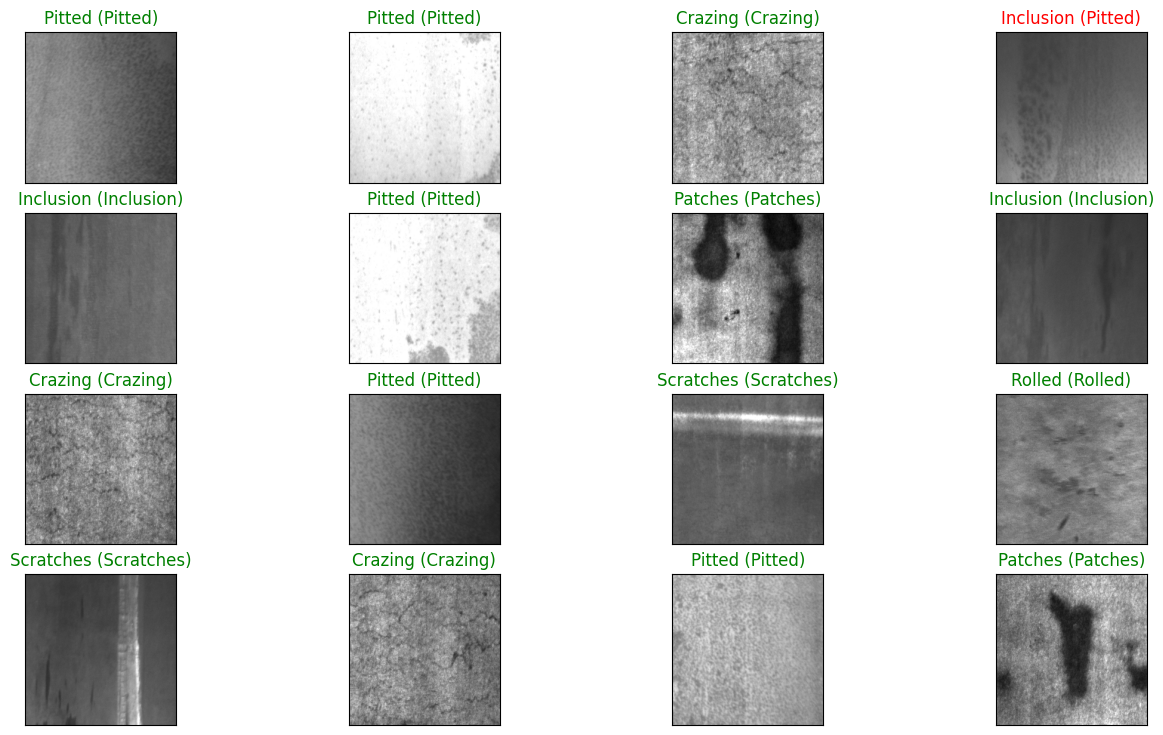

In [20]:
# Let's visualize test prediction.

y_pred = model.predict(x_test)

# plot a raandom sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(16, 9))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=16, replace=False)):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_pred[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(target_labels[pred_idx], target_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))

## Save Model
Let's save the whole model as well as only the weights for subsequent uses.
As of 2023, the SavedModel is recommended in favour of the H5 format.

In [31]:
model_file = "metal-inspection"
model.save(model_file)
# model.save(model_file + ".h5")
#model.save_weights("metal-inspection-weights.h5")

INFO:tensorflow:Assets written to: metal-inspection\assets


INFO:tensorflow:Assets written to: metal-inspection\assets


## Convert Model
To use the computed model for applications with limited computer power, the model is converted to the Tensorflow Lite format. It is recommended to convert the SavedModel instead of converting the Keras model.

In [37]:
saved_model_dir = cur_dir + "/" + model_file

converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)
tflite_model = converter.convert()

# Save the model
with open(model_file + '.tflite', 'wb') as f:
  f.write(tflite_model)
print("Converted!")

Converted!
